In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
object_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in object_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [5]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365


# EDA

<AxesSubplot:xlabel='price', ylabel='Count'>

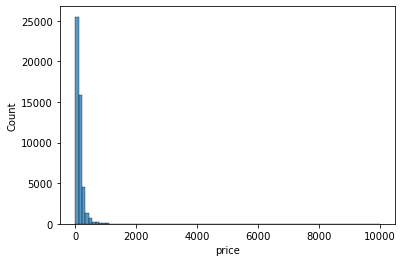

In [6]:
sns.histplot(df.price, bins=90)

<AxesSubplot:xlabel='price', ylabel='Count'>

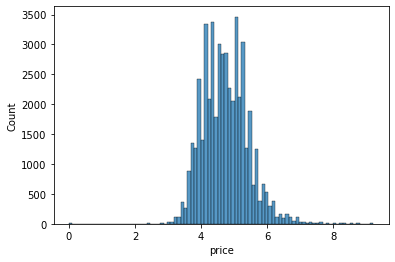

In [7]:
log_price = np.log1p(df.price)

sns.histplot(log_price, bins=90)
# more or less better. Resembles normal distribution

In [8]:
base = ['latitude', 'longitude', 'price', 'minimum_nights',
        'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [9]:
df_base = df[base]
df_base.head(2)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355


# Q1

In [10]:
df_base.isnull().sum()
# reviews_per_month is a feature with missing values

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df['reviews_per_month'].isnull().sum()/df['reviews_per_month'].sum() * 100
# 18% of all reviews are missing

18.84513022487422

# Q2

In [12]:
df['minimum_nights'].median()
# the median number of nights is 3

3.0

In [13]:
np.random.seed(42)

length = len(df_base)
array_length = np.arange(length)
np.random.shuffle(array_length)

df_shuffle = df_base.iloc[array_length]
df_shuffle = df_shuffle.reset_index(drop=True)

In [14]:
df_shuffle.head(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,89,3,62,0.71,1,189
1,40.70666,-73.90779,30,21,0,NaN,1,73
2,40.76116,-73.99016,120,2,17,0.43,1,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
full_train, df_test = train_test_split(df_shuffle, test_size=0.2, random_state=42)
df_train, df_valid = train_test_split(full_train, test_size=0.25, random_state=42)

In [17]:
len(df_test), len(df_train), len(df_valid)

(9779, 29337, 9779)

In [18]:
y_test = np.log1p(df_test.price.values)
y_train = np.log1p(df_train.price.values)
y_valid = np.log1p(df_valid.price.values)

In [19]:
del df_train['price']
del df_valid['price']
del df_test['price']

In [20]:
df_train.head(2)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
13575,40.76687,-73.98644,1,0,NaN,1,364
48476,40.86948,-73.92122,2,0,NaN,1,65


# Q3

In [21]:
mean_value = df_train.reviews_per_month.mean()
mean_value

1.3731128672049646

In [22]:
from sklearn.linear_model import LinearRegression, Ridge

In [23]:
df_zero_filled = df_train.fillna(0)
df_mean_filled = df_train.fillna(mean_value)

In [24]:
df_zero_filled.isnull().sum(), df_mean_filled.isnull().sum()

(latitude                          0
 longitude                         0
 minimum_nights                    0
 number_of_reviews                 0
 reviews_per_month                 0
 calculated_host_listings_count    0
 availability_365                  0
 dtype: int64,
 latitude                          0
 longitude                         0
 minimum_nights                    0
 number_of_reviews                 0
 reviews_per_month                 0
 calculated_host_listings_count    0
 availability_365                  0
 dtype: int64)

In [25]:
df_zero_dict = df_zero_filled.to_dict(orient='records')
df_mean_dict = df_mean_filled.to_dict(orient='records')

In [26]:
df_zero_dict

[{'latitude': 40.76687,
  'longitude': -73.98644,
  'minimum_nights': 1,
  'number_of_reviews': 0,
  'reviews_per_month': 0.0,
  'calculated_host_listings_count': 1,
  'availability_365': 364},
 {'latitude': 40.86948,
  'longitude': -73.92122,
  'minimum_nights': 2,
  'number_of_reviews': 0,
  'reviews_per_month': 0.0,
  'calculated_host_listings_count': 1,
  'availability_365': 65},
 {'latitude': 40.68509,
  'longitude': -73.93854,
  'minimum_nights': 3,
  'number_of_reviews': 1,
  'reviews_per_month': 0.01,
  'calculated_host_listings_count': 2,
  'availability_365': 300},
 {'latitude': 40.71813,
  'longitude': -73.96464,
  'minimum_nights': 5,
  'number_of_reviews': 2,
  'reviews_per_month': 0.07,
  'calculated_host_listings_count': 1,
  'availability_365': 0},
 {'latitude': 40.75123,
  'longitude': -73.87993,
  'minimum_nights': 1,
  'number_of_reviews': 204,
  'reviews_per_month': 5.27,
  'calculated_host_listings_count': 2,
  'availability_365': 0},
 {'latitude': 40.71198,
  'lon

In [27]:
# to extract features we'll use DictVectorizer
from sklearn.feature_extraction import DictVectorizer

dv_zero = DictVectorizer(sparse=False)
dv_mean = DictVectorizer(sparse=False)

dv_zero.fit(df_zero_dict)
dv_mean.fit(df_mean_dict)

X_zero = dv_zero.transform(df_zero_dict)
X_mean = dv_mean.transform(df_mean_dict)

In [28]:
model_zero = LinearRegression()
model_mean = LinearRegression()

model_zero.fit(X_zero, y_train)
model_mean.fit(X_mean, y_train)

LinearRegression()

In [29]:
# for validation dataset we also need to split
# into 2 as first will prepare and train with 0
# and second - with mean

df_valid_zero = df_valid.fillna(0)
df_valid_mean = df_valid.fillna(mean_value)

In [30]:
df_valid_dict_zero = df_valid_zero.to_dict(orient='records')
df_valid_dict_mean = df_valid_mean.to_dict(orient='records')

X_valid_zero = dv_zero.transform(df_valid_dict_zero)
X_valid_mean = dv_mean.transform(df_valid_dict_mean)

In [31]:
y_predict_zero = model_zero.predict(X_valid_zero)
y_predict_mean = model_mean.predict(X_valid_mean)

In [32]:
from sklearn.metrics import mean_squared_error
# true, predictions

result_zero = np.sqrt(mean_squared_error(y_valid, y_predict_zero))
result_mean = np.sqrt(mean_squared_error(y_valid, y_predict_mean))

In [33]:
f"zero: {round(result_zero,2)}; mean: {round(result_mean,2)}"

'zero: 0.64; mean: 0.64'

# Q4

In [34]:
df_reg = df_train.fillna(0)
df_reg.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [35]:
df_reg_dict = df_reg.to_dict(orient='records')

In [36]:
dv_reg = DictVectorizer(sparse=True)
X_reg_train = dv_reg.fit_transform(df_reg_dict)

In [37]:
model_reg = Ridge()
model_reg.fit(X_reg_train, y_train)

Ridge()

In [38]:
df_valid_reg = df_valid.fillna(0)

In [39]:
df_valid_reg_dict = df_valid_reg.to_dict(orient='records')

In [40]:
df_valid_reg_dict

[{'latitude': 40.70955,
  'longitude': -73.95085,
  'minimum_nights': 4,
  'number_of_reviews': 17,
  'reviews_per_month': 0.29,
  'calculated_host_listings_count': 1,
  'availability_365': 4},
 {'latitude': 40.75379,
  'longitude': -73.96433,
  'minimum_nights': 30,
  'number_of_reviews': 1,
  'reviews_per_month': 1.0,
  'calculated_host_listings_count': 14,
  'availability_365': 302},
 {'latitude': 40.80152,
  'longitude': -73.9509,
  'minimum_nights': 2,
  'number_of_reviews': 12,
  'reviews_per_month': 0.24,
  'calculated_host_listings_count': 1,
  'availability_365': 0},
 {'latitude': 40.73173,
  'longitude': -74.00904,
  'minimum_nights': 3,
  'number_of_reviews': 0,
  'reviews_per_month': 0.0,
  'calculated_host_listings_count': 1,
  'availability_365': 0},
 {'latitude': 40.67851,
  'longitude': -73.98439,
  'minimum_nights': 1,
  'number_of_reviews': 9,
  'reviews_per_month': 0.46,
  'calculated_host_listings_count': 17,
  'availability_365': 364},
 {'latitude': 40.65237,
  'lo

In [41]:
X_valid_reg = dv_reg.transform(df_valid_reg_dict)

In [42]:
y_predict_valid = model_reg.predict(X_valid_reg)

In [43]:
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_predict_valid))

In [44]:
rmse_valid

0.6446830941274692

<h3>
    Let's try various reg values.<br>
</h3>

In [45]:
model_reg = Ridge()

In [46]:
def train_model(model, X_train, y_train, X_valid, y_valid):
    total = {}
    
    for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
        if r == 0:
            model.fit(X_train, y_train)
        else:
            model.fit(X_train, y_train, sample_weight=r)
            
        prediction = model.predict(X_valid)
        rmse = np.sqrt(mean_squared_error(y_valid, prediction))
        
        total[r] = round(rmse, 2)
        
    return total

In [47]:
train_model(model_reg, X_reg_train, y_train, X_valid_reg, y_valid)

{0: 0.64,
 1e-06: 0.69,
 0.0001: 0.69,
 0.001: 0.69,
 0.01: 0.69,
 0.1: 0.69,
 1: 0.64,
 5: 0.69,
 10: 0.69}

# Q5

In [48]:
class LinearPrediction:
    '''
    1. At first we transform all df
    into desired one, i.e. base + shuffle
    
    2. Then  we split in desired chunks
    
    3. all further analysis is done
    with the help of sklearn
    '''
    def __init__(self, model, df, seed, dv, base):
        self.model = model
        self.df = df.copy()
        self.seed = seed
        self.dv_train = dv
        self.dv_full_train = dv
        self.base = base
        
    def __call__(self):
        self._transform_df()
        full_train, test, train, valid = self._split_data()
        
        # target
        self.y_full = self._target(full_train)
        self.y_test = self._target(test)
        self.y_train = self._target(train)
        self.y_valid = self._target(valid)
        
        # dict data
        full_dict = self._data_preparation(full_train)
        test_dict = self._data_preparation(test)
        train_dict = self._data_preparation(train)
        valid_dict = self._data_preparation(valid)
        
        # X train
        self.X_full = self._dv_fit_full_train(full_dict)
        self.X_train = self._dv_fit_train(train_dict)
        
        # At first we transform valid on train
        self.X_valid = self._dv_transform(valid_dict)
        
        self._train_model(self.X_train, self.y_train)
        prediction = self._prediction(self.X_valid)
        final = self._rmse(self.y_valid, prediction)
        return final
        
    def _transform_df(self):
        df_base = self.df[self.base]
        
        np.random.seed(self.seed)
        length = len(df_base)
        array_length = np.arange(length)
        np.random.shuffle(array_length)

        df_shuffle = df_base.iloc[array_length]
        self.df = df_shuffle.reset_index(drop=True)

    def _split_data(self):
        full_train, df_test = train_test_split(self.df, test_size=0.2, random_state=self.seed)
        df_train, df_valid = train_test_split(full_train, test_size=0.25, random_state=self.seed)
        
        full_train = full_train.fillna(0)
        df_test = df_test.fillna(0)
        df_train = df_train.fillna(0)
        df_valid = df_valid.fillna(0)
        
        return full_train, df_test, df_train, df_valid
    
    def _target(self, data):
        y_data = np.log1p(data.price.values)
        del data['price']
        return y_data

    def _data_preparation(self, data):
        dict_data = data.to_dict(orient='records')
        return dict_data
    
    def _dv_fit_train(self, data):
        X = self.dv_train.fit_transform(data)
        return X
    
    def _dv_fit_full_train(self, data):
        X = self.dv_full_train.fit_transform(data)
        return X
    
    def _dv_transform(self, data):
        X = self.dv_train.transform(data)
        return X
    
    def _train_model(self, X, y):
        self.model.fit(X, y)

    def _prediction(self, data):
        result = self.model.predict(data)
        return result
        
    def _rmse(self, target, pred):
        return np.sqrt(mean_squared_error(target, pred))
    

In [49]:
result = {}
base = ['latitude', 'longitude', 'price', 'minimum_nights',
        'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    prediction_result = LinearPrediction(LinearRegression(), df, s, DictVectorizer(sparse=True), base)
    result[s] = prediction_result()


<h3>
    Find std
</h3>

In [50]:
result

{0: 0.6416761466591074,
 1: 0.638495696256814,
 2: 0.6448840183581379,
 3: 0.6436531597076417,
 4: 0.6374125674225137,
 5: 0.650952150299524,
 6: 0.6425604326676023,
 7: 0.6432934132239698,
 8: 0.6503626076638717,
 9: 0.6332537250337582}

In [51]:
round(np.std(list(result.values())), 3)
# it's low -> model is stable

0.005

<h3>
    Find lowest rmse
</h3>

In [52]:
min(list(result.values()))

0.6332537250337582

# Q6

In [53]:
class RidgePrediction:
    '''
    In this model we won't
    split full_train into
    sub-chunks
    '''
    def __init__(self, model, df, seed, dv, r, base):
        self.model = model
        self.df = df.copy()
        self.seed = seed
        self.dv_full_train = dv
        self.r = r
        self.base = base
        
    def __call__(self):
        self._transform_df()
        full_train, test = self._split_data()
        
        # target
        self.y_full = self._target(full_train)
        self.y_test = self._target(test)
        
        # dict data
        full_dict = self._data_preparation(full_train)
        test_dict = self._data_preparation(test)
        
        # X full-train
        self.X_full = self._dv_fit_full_train(full_dict)
        
        # Trnasform test chunk
        self.X_test = self._dv_transform(test_dict)
        
        self._train_model(self.X_full, self.y_full)
        prediction = self._prediction(self.X_test)
        final = self._rmse(self.y_test, prediction)
        return final
    
    def _transform_df(self):
        df_base = self.df[self.base]
        
        np.random.seed(self.seed)
        length = len(df_base)
        array_length = np.arange(length)
        np.random.shuffle(array_length)

        df_shuffle = df_base.iloc[array_length]
        self.df = df_shuffle.reset_index(drop=True)
        

    def _split_data(self):
        full_train, df_test = train_test_split(self.df, test_size=0.2, random_state=self.seed)
        
        full_train = full_train.fillna(0)
        df_test = df_test.fillna(0)
        
        return full_train, df_test
    
    def _target(self, data):
        y_data = np.log1p(data.price.values)
        del data['price']
        return y_data

    def _data_preparation(self, data):
        dict_data = data.to_dict(orient='records')
        return dict_data
    
    def _dv_fit_full_train(self, data):
        X = self.dv_full_train.fit_transform(data)
        return X
    
    def _dv_transform(self, data):
        X = self.dv_full_train.transform(data)
        return X
    
    def _train_model(self, X, y):
        self.model.fit(X, y, sample_weight=self.r)

    def _prediction(self, data):
        result = self.model.predict(data)
        return result
        
    def _rmse(self, target, pred):
        return np.sqrt(mean_squared_error(target, pred))
    

In [54]:
base = ['latitude', 'longitude', 'price', 'minimum_nights',
        'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

prediction_result = RidgePrediction(Ridge(), df, 9, DictVectorizer(sparse=True), 0.001, base)
result = prediction_result()

In [55]:
result

0.6756138531982882

# Result

In [111]:
class LinearPrediction:
    '''
    1. At first we transform all df
    into desired one, i.e. base + shuffle
    
    2. Then  we split in desired chunks
    
    3. all further analysis is done
    with the help of sklearn
    '''
    def __init__(self, model, df, seed, dv, base):
        self.model = model
        self.df = df.copy()
        self.seed = seed
        self.dv_full_train = dv
        self.base = base
        
    def __call__(self):
        self._transform_df()
        full_train, test = self._split_data()
        
        # target
        self.y_full = self._target(full_train)
        self.y_test = self._target(test)
        
        # dict data
        full_dict = self._data_preparation(full_train)
        test_dict = self._data_preparation(test)
        
        # X full-train
        self.X_full = self._dv_fit_full_train(full_dict)
        
        # At first we transform valid on train
        self.X_test = self._dv_transform(test_dict)
        
        self._train_model(self.X_full, self.y_full)
        prediction = self._prediction(self.X_test)
        final = self._rmse(self.y_test, prediction)
        return final
        
    def _transform_df(self):
        df_base = self.df[self.base]
        
        np.random.seed(self.seed)
        length = len(df_base)
        array_length = np.arange(length)
        np.random.shuffle(array_length)

        df_shuffle = df_base.iloc[array_length]
        self.df = df_shuffle.reset_index(drop=True)

    def _split_data(self):
        full_train, df_test = train_test_split(self.df, test_size=0.2, random_state=self.seed)
        
        full_train = full_train.fillna(0)
        df_test = df_test.fillna(0)
        
        return full_train, df_test
    
    def _target(self, data):
        y_data = np.log1p(data.price.values)
        del data['price']
        return y_data

    def _data_preparation(self, data):
        dict_data = data.to_dict(orient='records')
        return dict_data
    
    def _dv_fit_full_train(self, data):
        X = self.dv_full_train.fit_transform(data)
        return X
    
    def _dv_transform(self, data):
        X = self.dv_full_train.transform(data)
        return X
    
    def _train_model(self, X, y):
        self.model.fit(X, y)

    def _prediction(self, data):
        result = self.model.predict(data)
        return result
        
    def _rmse(self, target, pred):
        return np.sqrt(mean_squared_error(target, pred))
    

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [112]:
# use 9 as seed
prediction_result = LinearPrediction(LinearRegression(), df, 9, DictVectorizer(sparse=True), base)
final = prediction_result()

In [113]:
final

0.6344584155022568

# Model usage

In [114]:
import random

def get_random(start=2, end=9750):
    return random.randint(start, end)

In [132]:
# take idx from test chunk and let's predict price
# using `final` as it encompasses model.

# !!Important: use `y_data` to extract initial price
def check_price():
    
    all_data = {}

    while len(all_data) != 10:
        random_idx = get_random()
        test_data = df_test.iloc[random_idx].fillna(0)
        
        # transform to dict
        dict_data = test_data.to_dict()
        
        # transform to 2D array
        X = prediction_result._dv_transform(dict_data)
        
        # prediction
        final_price = np.expm1(prediction_result._prediction(X)[0])
        
        real_price = np.expm1(y_test[random_idx])
        all_data[random_idx] = [round(real_price, 2), round(final_price, 2)]
    
    return all_data

In [133]:
all_prices = check_price()

In [134]:
all_prices

{5750: [250.0, 89.58],
 3884: [299.0, 141.25],
 3663: [70.0, 121.91],
 4512: [110.0, 143.93],
 6498: [60.0, 99.74],
 4469: [75.0, 95.24],
 4864: [64.0, 122.79],
 6380: [70.0, 112.26],
 3268: [125.0, 95.09],
 2689: [150.0, 109.72]}